<a href="https://colab.research.google.com/github/daniellopes04/perfomance-evaluation/blob/main/cap1_35_37_DanielLopesdeSousa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 1 - Simulações
## Daniel Lopes de Sousa

O livro-texto provê arquivos em R com as principais funções utilizadas nos exercícios. Estes arquivos encontram-se na pasta r_files neste repositório. Para fins de melhor visualização, tais scripts foram traduzidos para Python quando necessário. Nas simulações dos exercícios a seguir, foram traduzidos os arquivos gamblersruin.r.

## Simulação da Ruína do Apostador

### Descrição do problema

Considere um apostador que tem um montante inicial (stake) de k dólares. Ele repetidamente aposta $1 num jogo em que a probabilidade de ganhar é p e a probabilidade de perder é 1 - p. Os ganhos sucessivos do apostador podem ser representados por um passeio aleatório iniciado em k.

Suponha que o apostador decida parar quando seu ganho atinja um certo valor $n (n > k) ou chegue a 0, o que vier primeiro. Qual é a probabilidade de que o apostador se encontre eventualmente arruinado? Este é o problema clássico da ruína do apostador, primeiro discutido pelos matemáticos Blaise Pascal e Pierre Fermat em 1656. 

### Simulação

O problema é simulado abaixo, com k = 10, n = 40 e p = 0.5.

In [ ]:
import numpy as np

def gamble(k, n, p):
  rg = np.random.default_rng()
  stake = k

  while (stake > 0 and stake < n):
    fortuneList.append(int(stake))
    bet = rg.choice([-1,1], 1, replace=False, p=[1-p,p])
    stake += bet
    
  if(stake == 0):
    return 1
  else:
    return 0

Vemos que a função retorna 1 se o apostador atinge a ruína eventualmente e 0 se o apostador consegue atingir o valor n. Nesse caso, temos que a esperança da lista *simlist* gerada representa a probabilidade de que o apostar eventualmente esteja arruinado

In [ ]:
import statistics

simulations = 1000
simList = []

for _ in range(0, simulations):
  fortuneList = []
  simList.append(gamble(10, 40, 0.5))
  
mean = statistics.mean(simList)
print('Probabilidade de ruína: ' + str(mean))

Probabilidade de ruína: 0.753


Podemos fazer a simulação do apostador algumas vezes para perceber que, na maioria dos casos, o apostador chega à ruína antes de 1000 iterações de aposta.

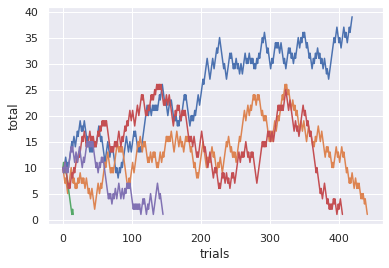

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

simulations = 5
simList = []

for _ in range(0, simulations):
    fortuneList = []
    simList.append(gamble(10, 40, 0.5))
    
    df = pd.DataFrame(dict(
        trials=list(range(0, len(fortuneList))),
        total=fortuneList))

    sns.set_theme(style="darkgrid")
    sns.lineplot(x="trials", y="total", data=df)

### Exercício 1.35

**a)** Queremos calcular a probabilidade de que o apostador ganhe \$100 antes de atingir a ruína. Nesse caso, temos que ele começa com \$60 e a probabilidade de que ele ganhe uma aposta é 0.5. Temos que a esperança (ou média) da lista com os resultados de cada aposta nos dá a probabilidade *p* de ruína do apostador. Portanto, o que queremos é o valor *1 - p*.

Para cacular o intervalo de confiança da média, faremos um número *n* de iterações, com várias simulações cada, calculando a média ao final de cada iteração.

In [ ]:
import statistics
import math
from scipy import stats

simulations = 1000
n = 10
meanList = []

for _ in range(0, n):
  simList = []
  for _ in range(0, simulations):
    fortuneList = []
    simList.append(gamble(60, 100, 0.5))
  meanList.append(statistics.mean(simList))

var = statistics.variance(meanList)
mean = statistics.mean(meanList)
stdev = statistics.stdev(meanList)
print('Média: ' + str(mean))
print('Probabilidade de ganhar $100: ' + str(1 - mean))
print('Variância : ' + str(var))
print('Intervalo de Confiança da Média (95%): ' + str(stats.norm.interval(0.95, loc=mean, scale = stdev / math.sqrt(len(meanList)))))

Média: 0.4116
Probabilidade de ganhar $100: 0.5884
Variância : 0.00022048888888888857
Intervalo de Confiança da Média (95%): (0.40239674521113716, 0.4208032547888629)


**b)** Da mesma forma que no item a, queremos calcular a probabilidade de que o apostador ganhe \$100 antes de perder tudo. Nessa caso, porém, a probabilidade de ganhar cada rodada é 0.51.

In [ ]:
import statistics
import math
from scipy import stats

simulations = 1000
n = 10
meanList = []

for _ in range(0, n):
  simList = []
  for _ in range(0, simulations):
    fortuneList = []
    simList.append(gamble(60, 100, 0.51))
  meanList.append(statistics.mean(simList))

var = statistics.variance(meanList)
mean = statistics.mean(meanList)
stdev = statistics.stdev(meanList)
print('Média: ' + str(mean))
print('Probabilidade de ganhar $100: ' + str(1 - mean))
print('Variância : ' + str(var))
print('Intervalo de Confiança da Média (95%): ' + str(stats.norm.interval(0.95, loc=mean, scale = stdev / math.sqrt(len(meanList)))))

Média: 0.0717
Probabilidade de ganhar $100: 0.9283
Variância : 5.867777777777779e-05
Intervalo de Confiança da Média (95%): (0.06695228194789145, 0.07644771805210855)


### Exercício 1.37

Neste exercício, vamos simular os resultados do exercício 1.28. Segundo o enunciado deste último, em um dia qualquer, o número de acidente numa rodovia tem uma distribuição de Poisson com parâmetro *A*. Este parâmetro é uma variável aleatória e varia dia a dia, distribuída uniformemente em *(0,3)*.

Queremos a média (esperança) e a variância do número de acidentes por dia.

In [ ]:
import numpy as np

simulations = 100000
n = 10
meanList = []

for _ in range(0, n):
  accidents = []
  for _ in range(0, simulations):
    A = np.random.uniform(0, 3)
    nAccidents = np.random.poisson(A)
    accidents.append(nAccidents)
  meanList.append(statistics.mean(accidents))

var = statistics.variance(meanList)
mean = statistics.mean(meanList)
stdev = statistics.stdev(meanList)
print('Média: ' + str(mean))
print('Variância : ' + str(var))
print('Intervalo de Confiança da Média (95%): ' + str(stats.norm.interval(0.95, loc=mean, scale = stdev / math.sqrt(len(meanList)))))
  

Média: 1.499435
Variância : 1.502480555555525e-05
Intervalo de Confiança da Média (95%): (1.4970325601603662, 1.501837439839634)


Ao fazermos a mostragem em gráfico dos valores dos acidentes por dia, obtemos uma Poisson, como visto abaixo.

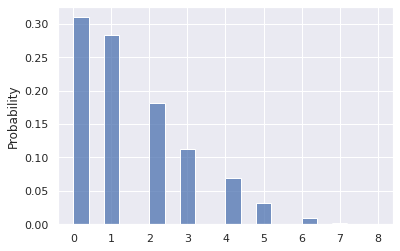

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.histplot(accidents, stat='probability', fill=True)
plt.show()

Podemos também fazer uma verificação da variação da média do número de acidentes por dia. Nesse caso, vamos rodas as simulações e criar a lista de acidentes algumas vezes para calcular diferentes médias para a visualização.

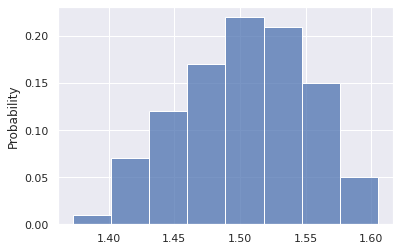

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

simulations = 1000
n = 100
means = []

for _ in range(0, n):
  accidents = []
  for _ in range(0, simulations):
    A = np.random.uniform(0, 3)
    nAccidents = np.random.poisson(A)
    accidents.append(nAccidents)

  means.append(statistics.mean(accidents))

sns.set_theme(style="darkgrid")
sns.histplot(means, stat='probability', fill=True)
plt.show()
